In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
from sklearn.datasets import make_classification

In [26]:
## make the dataset n_feature means no. of independent  ,, n_classses number of dependt output
X,y=make_classification(n_samples=1000, n_features=10,n_classes=2, random_state=42)

In [27]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,0.964799,-0.066449,0.986768,-0.358079,0.997266,1.181890,-1.615679,-1.210161,-0.628077,1.227274
1,-0.916511,-0.566395,-1.008614,0.831617,-1.176962,1.820544,1.752375,-0.984534,0.363896,0.209470
2,-0.109484,-0.432774,-0.457649,0.793818,-0.268646,-1.836360,1.239086,-0.246383,-1.058145,-0.297376
3,1.750412,2.023606,1.688159,0.006800,-1.607661,0.184741,-2.619427,-0.357445,-1.473127,-0.190039
4,-0.224726,-0.711303,-0.220778,0.117124,1.536061,0.597538,0.348645,-0.939156,0.175915,0.236224
...,...,...,...,...,...,...,...,...,...,...
995,-1.367638,1.462255,-1.154918,-0.290454,-0.413424,0.032396,1.545490,1.428760,1.687092,1.072542
996,-1.514876,-3.221016,-1.300744,0.395599,-0.527994,1.353069,1.777506,-1.680870,1.798510,0.034272
997,1.674633,1.754933,1.586154,0.018402,-1.514470,0.321593,-2.417694,0.692723,-1.503850,0.225264
998,-0.778609,-0.835689,-0.194842,1.097220,0.180071,-0.272933,-0.533188,-0.497354,2.472138,0.867187


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [29]:
## MOdel Training
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()

In [30]:
logistic.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [31]:
y_pred=logistic.predict(X_test)
print(y_pred)

[0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0
 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1
 1 1 1 0]


In [ ]:
## it give the proba of where x point lie in which classific
logistic.predict_proba(X_test)

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.8466666666666667
[[118  17]
 [ 29 136]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



Hyperparameter Tuning And Cross Validation

In [ ]:
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg','lbfg','libliner','sag','saga']

In [36]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [37]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [ ]:
## GridSEarchCV
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [39]:
grid

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 10, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfg', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [40]:
grid.fit(X_train,y_train)

e:\Machine\machine-learning-deep-learning-nlp\Machine Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
275 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Machine\machine-learning-deep-learning-nlp\Machine Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Machine\machine-learning-deep-learning-nlp\Machine Learning\venv\lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "e:\Machine\machine-learning-de

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 10, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfg', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [41]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [42]:
grid.best_score_

np.float64(0.8785714285714287)

In [43]:
y_pred=grid.predict(X_test)

In [44]:
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.8533333333333334
[[124  11]
 [ 33 132]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       135
           1       0.92      0.80      0.86       165

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300



## Randomized SearchCV

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
model=LogisticRegression()
randomcv=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,scoring='accuracy')

In [47]:
randomcv.fit(X_train,y_train)

e:\Machine\machine-learning-deep-learning-nlp\Machine Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Machine\machine-learning-deep-learning-nlp\Machine Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Machine\machine-learning-deep-learning-nlp\Machine Learning\venv\lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "e:\Machine\machine-learning-deep-learning-nlp\Mac

,estimator,LogisticRegression()
,param_distributions,"{'C': [100, 10, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfg', ...]}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [48]:
randomcv.best_score_

np.float64(0.8699999999999999)

In [49]:
randomcv.best_params_

{'solver': 'sag', 'penalty': 'l2', 'C': 100}

In [50]:
y_pred=randomcv.predict(X_test)

In [51]:
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.84
[[116  19]
 [ 29 136]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       135
           1       0.88      0.82      0.85       165

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



#### Logistics Regression For Multiclass classification Problem

In [54]:
## make the dataset n_feature means no. of independent  ,, n_classses number of dependt output
X,y=make_classification(n_samples=1000, n_features=10,n_informative=3, n_classes=3, random_state=42)

In [55]:
y

array([1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1,
       2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2,
       0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 1, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0,
       0, 2, 1, 2, 2, 0, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0,
       0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 0, 2,
       1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2,
       1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 0,
       2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1,
       0, 2, 0, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2,
       2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1,

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [63]:
## MOdel Training
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(multi_class='ovr')
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)

e:\Machine\machine-learning-deep-learning-nlp\Machine Learning\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [64]:
y_pred

array([2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 0,
       1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1,
       0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 2,
       0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0,
       2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2,
       1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 2,
       0, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2,
       0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2,
       0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1])

In [66]:
score=accuracy_score(y_pred,y_test)
print(score)
cm=confusion_matrix(y_pred,y_test)
print(cm)
print(classification_report(y_pred,y_test))

0.68
[[79 31  3]
 [16 38 11]
 [ 8 27 87]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       113
           1       0.40      0.58      0.47        65
           2       0.86      0.71      0.78       122

    accuracy                           0.68       300
   macro avg       0.67      0.67      0.66       300
weighted avg       0.72      0.68      0.70       300



### Logistics Regression for Imbalanced Dataset

In [67]:
# Generate and plot a synthetic imblaanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification


In [69]:
## imbalaced Dataset
X,y=make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,n_redundant=0
                        ,weights=[0.99],random_state=10)

In [70]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]], shape=(10000, 2))

In [71]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

In [72]:
import seaborn as sns

<Axes: xlabel='0', ylabel='1'>

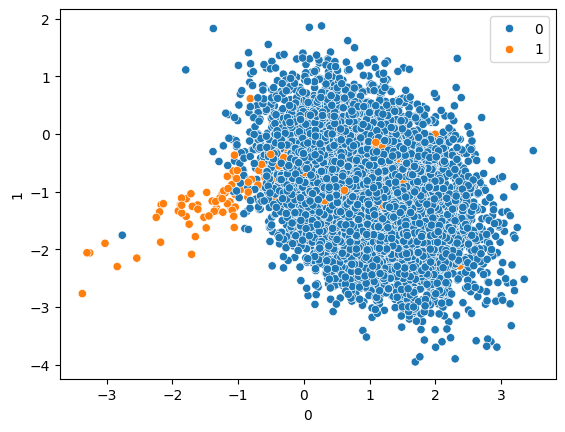

In [76]:
import pandas as pd
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [89]:
## let the dataset into train adn test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [90]:
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [91]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [95]:
## Hyperparameter tuning
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg','lbfg','libliner','sag','saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]


In [96]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [97]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfg', 'libliner', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [99]:
grid.fit(X_train,y_train)

e:\Machine\machine-learning-deep-learning-nlp\Machine Learning\venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\Machine\machine-learning-deep-learning-nlp\Machine Learning\venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\Machine\machine-learning-deep-learning-nlp\Machine Learning\venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\Machine\machine-learning-deep-learning-nlp\Machine Learning\venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\Machine\machine-learning-deep-learning-nlp\Machine Learning\venv\lib\site-packages\sklearn\linear_model\_sag.py:3

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 10, ...], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfg', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [100]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [101]:
y_pred=grid.predict(X_test)

In [102]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(2500,))

In [103]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [104]:
score=accuracy_score(y_pred,y_test)
print(score)
cm=confusion_matrix(y_pred,y_test)
print(cm)
print(classification_report(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.992
[[2468   18]
 [   2   12]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2486
           1       0.40      0.86      0.55        14

    accuracy                           0.99      2500
   macro avg       0.70      0.92      0.77      2500
weighted avg       1.00      0.99      0.99      2500

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2486
           1       0.40      0.86      0.55        14

    accuracy                           0.99      2500
   macro avg       0.70      0.92      0.77      2500
weighted avg       1.00      0.99      0.99      2500



In [105]:
model.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

.

## Logistics Regression With ROC cuve And ROC AUC score

In [107]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


In [108]:
## generate 2 class dataset
X,y=make_classification(n_samples=10000,n_classes=2,random_state=1)

In [109]:
## Split the datasets into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


In [110]:
# Created a dummy model with default ) as output (majority class)
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob 

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [111]:
## lets Create basic logistic Model
model=LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [112]:
## Predicition based on Probability
model_prob=model.predict_proba(X_test)

In [113]:
model_prob

array([[6.12776768e-05, 9.99938722e-01],
       [7.73418157e-01, 2.26581843e-01],
       [4.05782726e-01, 5.94217274e-01],
       ...,
       [7.86644146e-01, 2.13355854e-01],
       [2.10306799e-05, 9.99978969e-01],
       [9.61055448e-01, 3.89445515e-02]], shape=(2500, 2))

In [115]:
## lets focus on the psoitive outcome
model_prob=model_prob[:,1]

In [116]:
## lets calaculate the score
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9442296808295412


#### ✅ False Positive Rate (FPR) Formula 

FPR = FP / (FP + TN)

FPR = Wrong positives / All actual negatives



#### ✅ True Positive Rate (TPR) Formula

TPR = TP / (TP + FN)

TPR = Correct positives / All actual positives



In [117]:
## calculate ROC Curves
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [118]:
thresholds

array([           inf, 9.99985059e-01, 9.99817598e-01, 9.99813358e-01,
       9.90436731e-01, 9.90338751e-01, 9.82043516e-01, 9.81909673e-01,
       9.71207971e-01, 9.71092640e-01, 9.63816442e-01, 9.63784420e-01,
       9.58903060e-01, 9.58894362e-01, 9.54711471e-01, 9.53990555e-01,
       9.53293219e-01, 9.53044768e-01, 9.51262844e-01, 9.50854642e-01,
       9.50259170e-01, 9.49508437e-01, 9.36959061e-01, 9.36857505e-01,
       9.13610699e-01, 9.10820302e-01, 9.09126302e-01, 9.08971104e-01,
       9.07944067e-01, 9.07425057e-01, 9.00678940e-01, 9.00205743e-01,
       8.85565545e-01, 8.82348515e-01, 8.66605718e-01, 8.66336894e-01,
       8.65647476e-01, 8.65010399e-01, 8.63844910e-01, 8.63698068e-01,
       8.61894533e-01, 8.61716645e-01, 8.50767800e-01, 8.49189477e-01,
       8.43323375e-01, 8.42656601e-01, 8.37966291e-01, 8.36755216e-01,
       8.33786464e-01, 8.33778921e-01, 8.24114417e-01, 8.20997377e-01,
       8.08747999e-01, 8.08416920e-01, 8.07464000e-01, 8.06581878e-01,
      

In [121]:
model_fpr,model_tpr

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.15660685e-04,
        8.15660685e-04, 1.63132137e-03, 1.63132137e-03, 2.44698206e-03,
        2.44698206e-03, 3.26264274e-03, 3.26264274e-03, 4.07830343e-03,
        4.07830343e-03, 4.89396411e-03, 4.89396411e-03, 5.70962480e-03,
        5.70962480e-03, 6.52528548e-03, 6.52528548e-03, 7.34094617e-03,
        7.34094617e-03, 8.15660685e-03, 8.15660685e-03, 8.97226754e-03,
        8.97226754e-03, 9.78792822e-03, 9.78792822e-03, 1.06035889e-02,
        1.06035889e-02, 1.14192496e-02, 1.14192496e-02, 1.22349103e-02,
        1.22349103e-02, 1.30505710e-02, 1.30505710e-02, 1.38662316e-02,
        1.38662316e-02, 1.46818923e-02, 1.46818923e-02, 1.54975530e-02,
        1.54975530e-02, 1.63132137e-02, 1.63132137e-02, 1.79445351e-02,
        1.79445351e-02, 1.87601958e-02, 1.87601958e-02, 2.03915171e-02,
        2.03915171e-02, 2.12071778e-02, 2.12071778e-02, 2.28384992e-02,
        2.28384992e-02, 2.44698206e-02, 2.44698206e-02, 2.528548

In [122]:
import seaborn as sns

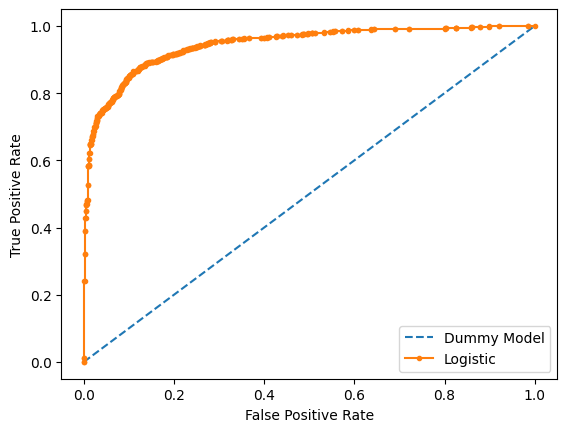

In [128]:
# plot the roc curve for the model
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

C:\Users\inamu\AppData\Local\Temp\ipykernel_15340\1252278335.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  pyplot.legend()


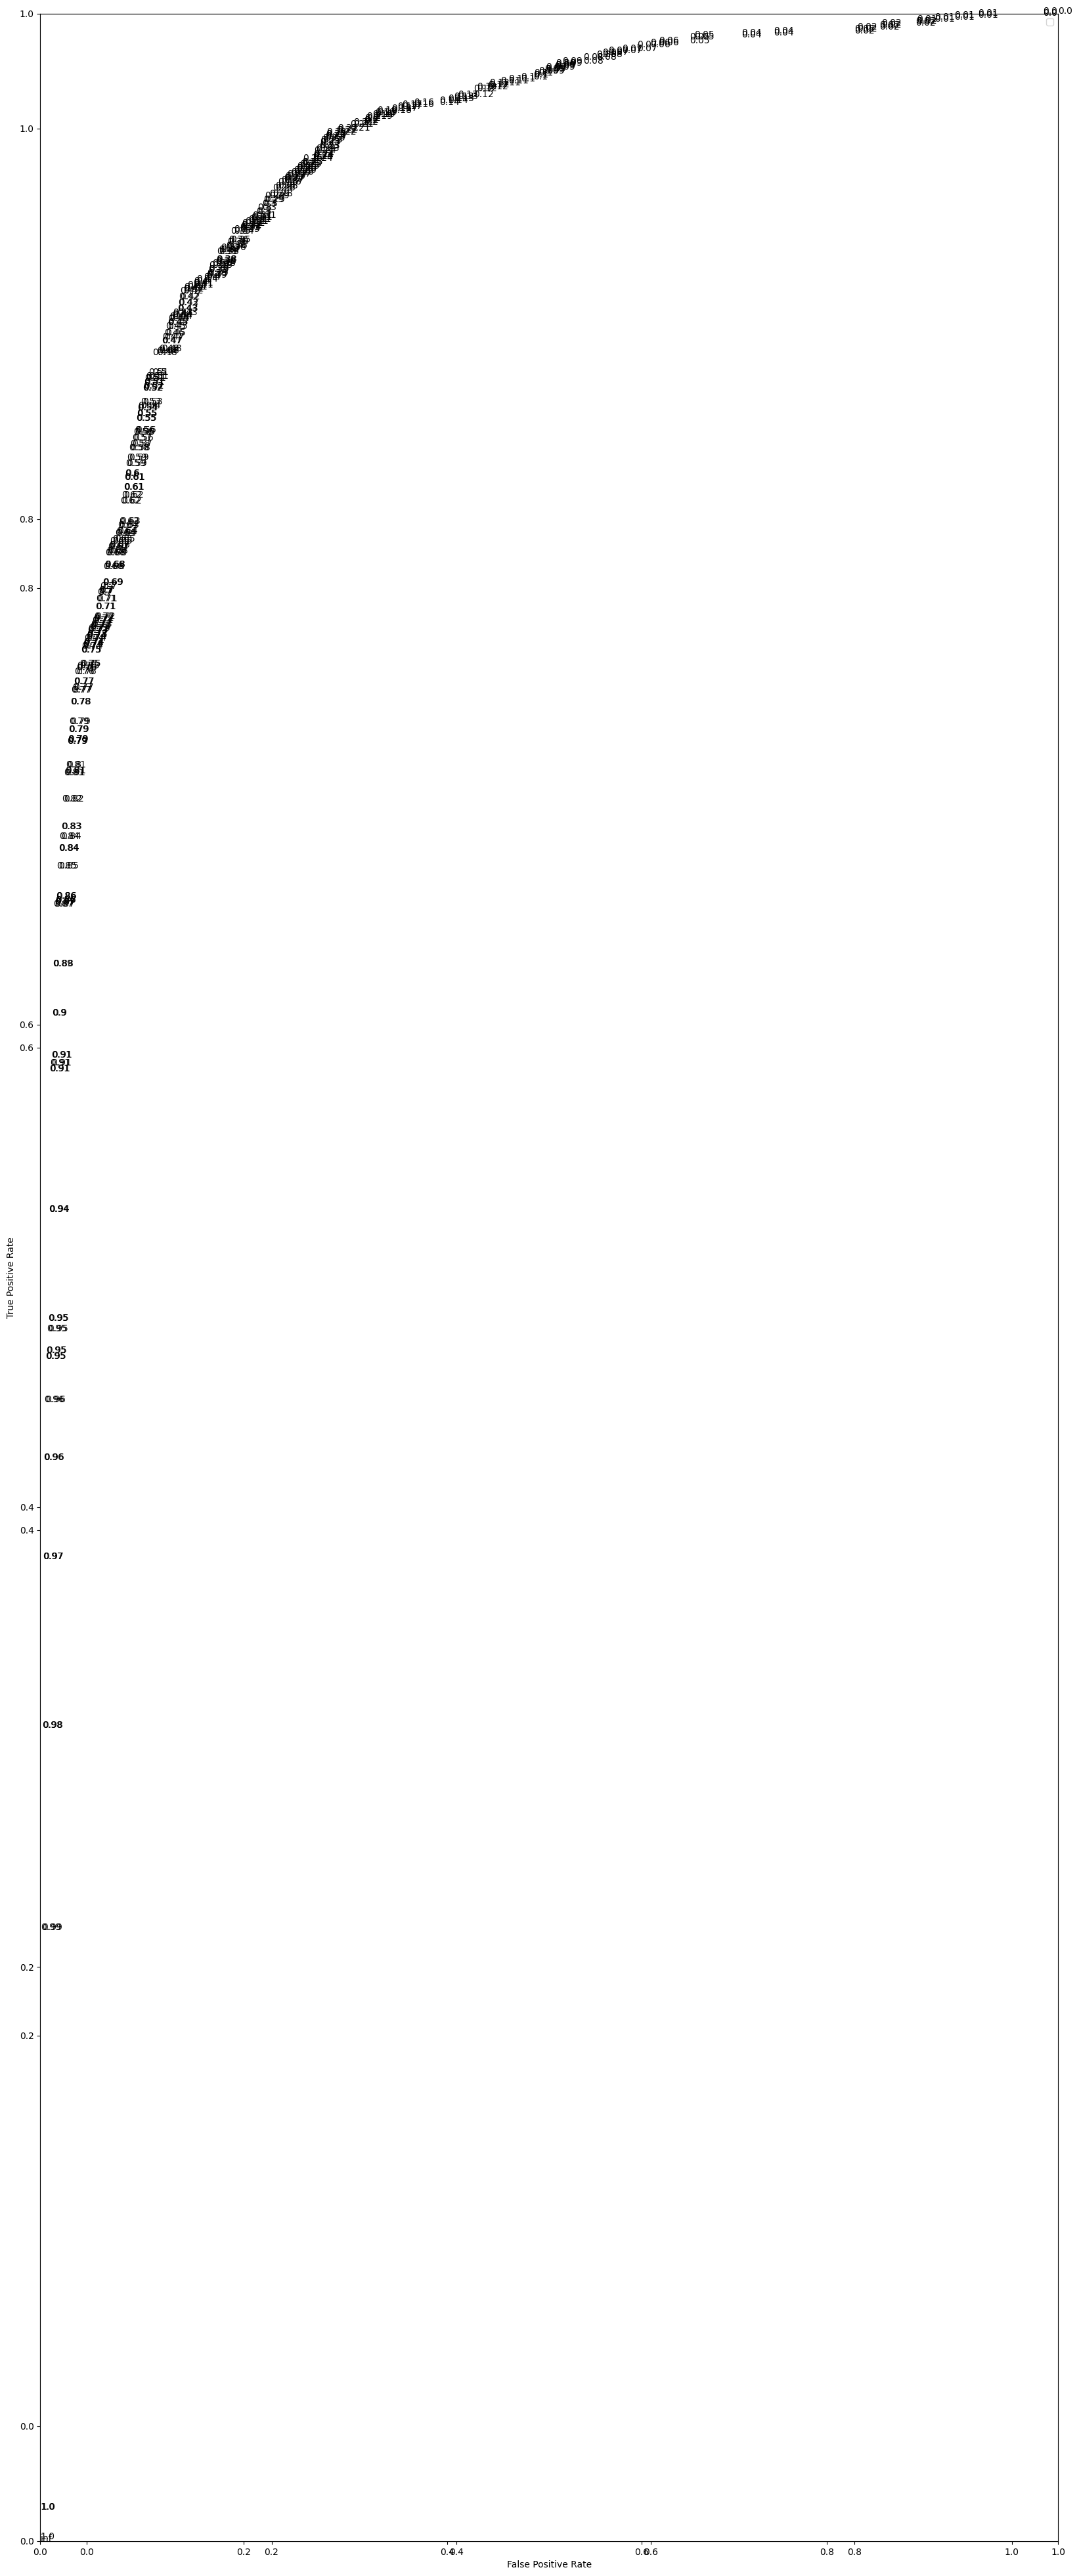

In [129]:
# plot the roc curve for the model
import numpy as np
fig = pyplot.figure(figsize=(20,50))
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')
ax = fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr,thresholds):   
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0],xyz[1]))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()